In [2]:
# import required modules

import torch
import torch.nn as nn

In [15]:
# define variables

n_input, n_hidden, n_out, batch_size, learning_rate = 10, 15, 1, 100, 0.0001

In [18]:
# randomly initialize the dummy input and the output target data

data_x = torch.randn(batch_size, n_input)
data_y = (torch.rand(size=(batch_size, 1)) < 0.5).float()

In [19]:
# We initialized the input data with 100 data samples with
# 10 features each and respectively initialized the output data with 100 data points.

print(data_x.size())
print(data_y.size())

torch.Size([100, 10])
torch.Size([100, 1])


In [20]:
print(data_x[0:5])

tensor([[-1.4049e+00,  1.7572e+00,  1.2880e+00,  9.2308e-01, -1.0265e-01,
          1.9419e+00,  6.1317e-01,  1.0600e+00, -4.5263e-01, -3.5233e-01],
        [ 2.1110e+00,  1.9413e+00, -7.6120e-01, -5.6613e-01, -5.8603e-01,
          2.5444e-01,  7.0717e-01, -1.5549e+00, -5.2843e-01,  1.0033e+00],
        [-1.0611e-01, -1.5334e+00, -1.5628e-01, -3.9568e-01, -9.7457e-01,
         -5.4495e-01, -1.8796e+00,  1.7448e+00, -1.1053e+00, -1.0502e-01],
        [ 1.0891e-01, -1.1494e-01,  1.9898e-01,  5.3897e-01,  1.9364e+00,
          4.7463e-01,  3.2851e-01, -9.4168e-01, -4.5739e-01, -3.5489e-01],
        [-9.4076e-01, -1.8246e-03,  1.5098e+00, -5.8100e-01, -2.8061e-01,
          1.5591e+00,  1.2097e-01,  7.3298e-01, -2.1618e-01,  7.4240e-01]])


In [21]:
print(data_y[0:5])

tensor([[0],
        [1],
        [0],
        [1],
        [0]], dtype=torch.int32)


In [22]:
# Using in-built functions, we will create the simple sequential model
# with output sigmoid layer as follows:

model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.ReLU(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=1, bias=True)
  (3): Sigmoid()
)


In [10]:
print(model.parameters())

<generator object Module.parameters at 0x7e0957ebab90>


In [23]:
# define the loss function and the optimizer for gradient descent

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
# model prediction

losses = []
for epoch in range(50000):
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

RuntimeError: ignored

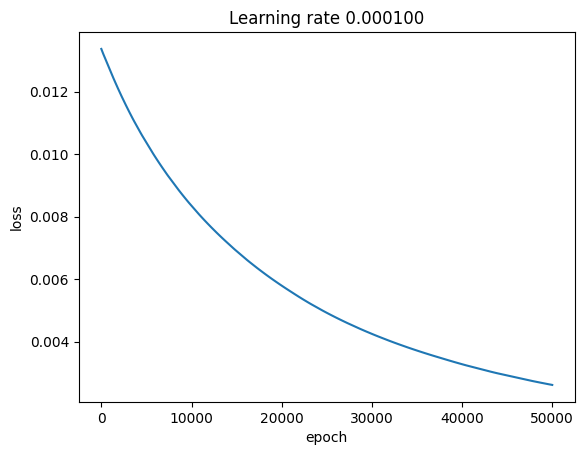

In [17]:
# plot the loss and see how the model is training over each epoch

import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()